<a href="https://colab.research.google.com/github/moo0la/final_peoject/blob/main/Bitcoin_price_predictor_by_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Bitcoin price predictor by LinearRegression



###Importing Libraries

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


###Loading the Dataset and formating

In [2]:
url = 'https://api.binance.com/api/v3/klines'



r = requests.get(url,params={'symbol':'BTCUSDT','interval': '1d','limit':2000})
r


<Response [200]>

In [3]:
collumns = """

1499040000000,      // Open time
    "0.01634790",       // Open
    "0.80000000",       // High
    "0.01575800",       // Low
    "0.01577100",       // Close
    "148976.11427815",  // Volume
    1499644799999,      // Close time
    "2434.19055334",    // Quote asset volume
    308,                // Number of trades
    "1756.87402397",    // Taker buy base asset volume
    "28.46694368",      // Taker buy quote asset volume
    "17928899.62484339" // Ignore.

""".split("//")[1:-1]


my_col_names = [sub_str.split('\n')[0].lower().strip().replace(' ','_') for sub_str in collumns]
# my_col_names.insert(0, 'timestamp')
my_col_names.append('ignore')
my_col_names

['open_time',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'close_time',
 'quote_asset_volume',
 'number_of_trades',
 'taker_buy_base_asset_volume',
 'taker_buy_quote_asset_volume',
 'ignore']

In [4]:
df = pd.DataFrame(r.json(),columns = my_col_names)
df.index = pd.to_datetime(df.open_time*1000000)
#df.index = pd.DatetimeIndex(df.open_time*1000000)
df.index.name = 'Date'
#df['Date']=df.index
df = df.drop(columns=['open_time','close_time','ignore'])
df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
Date,,,,,,,,,
2019-04-18,5202.41000000,5287.00000000,5198.80000000,5258.44000000,22619.23900100,118573129.86520114,167110,12104.85293200,63464128.54331125
2019-04-19,5258.44000000,5320.00000000,5175.00000000,5258.68000000,24611.23632300,128937309.63806376,178148,12889.68334400,67549701.12506344
2019-04-20,5258.68000000,5333.42000000,5230.10000000,5291.73000000,19168.90827400,101343660.15324434,157080,10029.27226200,53029542.91017945
2019-04-21,5292.91000000,5314.35000000,5165.00000000,5256.14000000,25549.57093900,133929931.15068736,210494,13147.77101600,68909870.81367928
2019-04-22,5257.41000000,5400.00000000,5208.35000000,5357.14000000,29563.85230900,156632202.97099613,210361,15828.00485100,83879362.28322349
...,...,...,...,...,...,...,...,...,...
2022-01-07,43082.30000000,43145.83000000,40610.00000000,41566.48000000,54836.50818000,2293851015.46523690,1406635,26519.39261000,1109740200.23872120
2022-01-08,41566.48000000,42300.00000000,40501.00000000,41679.74000000,32952.73111000,1367233494.82776660,1021908,16462.53747000,683155535.42153480
2022-01-09,41679.74000000,42786.70000000,41200.02000000,41864.62000000,22724.39426000,952830064.51258490,752733,11399.78979000,478046850.27715200


In [5]:
df.shape

(1000, 9)

In [6]:
r = requests.get(url,params={'symbol':'BTCUSDT','interval': '1d','limit':2000,'endTime':(1641348720-1)*2000})
pd.DatetimeIndex(pd.DataFrame(r.json(),columns = my_col_names).open_time*1000000)


DatetimeIndex(['2019-04-18', '2019-04-19', '2019-04-20', '2019-04-21',
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-27',
               ...
               '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-10', '2022-01-11'],
              dtype='datetime64[ns]', name='open_time', length=1000, freq=None)

In [7]:
cols = df.columns
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [8]:
df['taker_sell_base_asset_volume'] = df.volume - df.taker_buy_base_asset_volume
df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,taker_sell_base_asset_volume
Date,,,,,,,,,,
2019-04-18,5202.41,5287.00,5198.80,5258.44,22619.239001,1.185731e+08,167110,12104.852932,6.346413e+07,10514.386069
2019-04-19,5258.44,5320.00,5175.00,5258.68,24611.236323,1.289373e+08,178148,12889.683344,6.754970e+07,11721.552979
2019-04-20,5258.68,5333.42,5230.10,5291.73,19168.908274,1.013437e+08,157080,10029.272262,5.302954e+07,9139.636012
2019-04-21,5292.91,5314.35,5165.00,5256.14,25549.570939,1.339299e+08,210494,13147.771016,6.890987e+07,12401.799923
2019-04-22,5257.41,5400.00,5208.35,5357.14,29563.852309,1.566322e+08,210361,15828.004851,8.387936e+07,13735.847458
...,...,...,...,...,...,...,...,...,...,...
2022-01-07,43082.30,43145.83,40610.00,41566.48,54836.508180,2.293851e+09,1406635,26519.392610,1.109740e+09,28317.115570
2022-01-08,41566.48,42300.00,40501.00,41679.74,32952.731110,1.367233e+09,1021908,16462.537470,6.831555e+08,16490.193640
2022-01-09,41679.74,42786.70,41200.02,41864.62,22724.394260,9.528301e+08,752733,11399.789790,4.780469e+08,11324.604470


In [9]:
df['order_flow_imbalance'] = 1-(df.taker_sell_base_asset_volume/df.taker_buy_base_asset_volume)
df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,taker_sell_base_asset_volume,order_flow_imbalance
Date,,,,,,,,,,,
2019-04-18,5202.41,5287.00,5198.80,5258.44,22619.239001,1.185731e+08,167110,12104.852932,6.346413e+07,10514.386069,0.131391
2019-04-19,5258.44,5320.00,5175.00,5258.68,24611.236323,1.289373e+08,178148,12889.683344,6.754970e+07,11721.552979,0.090625
2019-04-20,5258.68,5333.42,5230.10,5291.73,19168.908274,1.013437e+08,157080,10029.272262,5.302954e+07,9139.636012,0.088704
2019-04-21,5292.91,5314.35,5165.00,5256.14,25549.570939,1.339299e+08,210494,13147.771016,6.890987e+07,12401.799923,0.056737
2019-04-22,5257.41,5400.00,5208.35,5357.14,29563.852309,1.566322e+08,210361,15828.004851,8.387936e+07,13735.847458,0.132181
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,43082.30,43145.83,40610.00,41566.48,54836.508180,2.293851e+09,1406635,26519.392610,1.109740e+09,28317.115570,-0.067789
2022-01-08,41566.48,42300.00,40501.00,41679.74,32952.731110,1.367233e+09,1021908,16462.537470,6.831555e+08,16490.193640,-0.001680
2022-01-09,41679.74,42786.70,41200.02,41864.62,22724.394260,9.528301e+08,752733,11399.789790,4.780469e+08,11324.604470,0.006595


In [10]:
df['price_change'] = df.close.pct_change()
df = df.dropna()
df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,taker_sell_base_asset_volume,order_flow_imbalance,price_change
Date,,,,,,,,,,,,
2019-04-19,5258.44,5320.00,5175.00,5258.68,24611.236323,1.289373e+08,178148,12889.683344,6.754970e+07,11721.552979,0.090625,0.000046
2019-04-20,5258.68,5333.42,5230.10,5291.73,19168.908274,1.013437e+08,157080,10029.272262,5.302954e+07,9139.636012,0.088704,0.006285
2019-04-21,5292.91,5314.35,5165.00,5256.14,25549.570939,1.339299e+08,210494,13147.771016,6.890987e+07,12401.799923,0.056737,-0.006726
2019-04-22,5257.41,5400.00,5208.35,5357.14,29563.852309,1.566322e+08,210361,15828.004851,8.387936e+07,13735.847458,0.132181,0.019216
2019-04-23,5357.14,5600.00,5332.41,5493.31,41262.103917,2.271541e+08,282563,21260.014469,1.170548e+08,20002.089448,0.059169,0.025418
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,43082.30,43145.83,40610.00,41566.48,54836.508180,2.293851e+09,1406635,26519.392610,1.109740e+09,28317.115570,-0.067789,-0.035185
2022-01-08,41566.48,42300.00,40501.00,41679.74,32952.731110,1.367233e+09,1021908,16462.537470,6.831555e+08,16490.193640,-0.001680,0.002725
2022-01-09,41679.74,42786.70,41200.02,41864.62,22724.394260,9.528301e+08,752733,11399.789790,4.780469e+08,11324.604470,0.006595,0.004436


In [11]:
df["low"] = pd.to_numeric(df["low"])
df["high"] = pd.to_numeric(df["high"])
df['Mean'] = (df['low'] + df['high'])/2
df=df.dropna()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,taker_sell_base_asset_volume,order_flow_imbalance,price_change,Mean
Date,,,,,,,,,,,,,
2019-04-19,5258.44,5320.00,5175.00,5258.68,24611.236323,1.289373e+08,178148,12889.683344,6.754970e+07,11721.552979,0.090625,0.000046,5247.500
2019-04-20,5258.68,5333.42,5230.10,5291.73,19168.908274,1.013437e+08,157080,10029.272262,5.302954e+07,9139.636012,0.088704,0.006285,5281.760
2019-04-21,5292.91,5314.35,5165.00,5256.14,25549.570939,1.339299e+08,210494,13147.771016,6.890987e+07,12401.799923,0.056737,-0.006726,5239.675
2019-04-22,5257.41,5400.00,5208.35,5357.14,29563.852309,1.566322e+08,210361,15828.004851,8.387936e+07,13735.847458,0.132181,0.019216,5304.175
2019-04-23,5357.14,5600.00,5332.41,5493.31,41262.103917,2.271541e+08,282563,21260.014469,1.170548e+08,20002.089448,0.059169,0.025418,5466.205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,43082.30,43145.83,40610.00,41566.48,54836.508180,2.293851e+09,1406635,26519.392610,1.109740e+09,28317.115570,-0.067789,-0.035185,41877.915
2022-01-08,41566.48,42300.00,40501.00,41679.74,32952.731110,1.367233e+09,1021908,16462.537470,6.831555e+08,16490.193640,-0.001680,0.002725,41400.500
2022-01-09,41679.74,42786.70,41200.02,41864.62,22724.394260,9.528301e+08,752733,11399.789790,4.780469e+08,11324.604470,0.006595,0.004436,41993.360


In [12]:
df['Date']=df.index
df

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,taker_sell_base_asset_volume,order_flow_imbalance,price_change,Mean,Date
Date,,,,,,,,,,,,,,
2019-04-19,5258.44,5320.00,5175.00,5258.68,24611.236323,1.289373e+08,178148,12889.683344,6.754970e+07,11721.552979,0.090625,0.000046,5247.500,2019-04-19
2019-04-20,5258.68,5333.42,5230.10,5291.73,19168.908274,1.013437e+08,157080,10029.272262,5.302954e+07,9139.636012,0.088704,0.006285,5281.760,2019-04-20
2019-04-21,5292.91,5314.35,5165.00,5256.14,25549.570939,1.339299e+08,210494,13147.771016,6.890987e+07,12401.799923,0.056737,-0.006726,5239.675,2019-04-21
2019-04-22,5257.41,5400.00,5208.35,5357.14,29563.852309,1.566322e+08,210361,15828.004851,8.387936e+07,13735.847458,0.132181,0.019216,5304.175,2019-04-22
2019-04-23,5357.14,5600.00,5332.41,5493.31,41262.103917,2.271541e+08,282563,21260.014469,1.170548e+08,20002.089448,0.059169,0.025418,5466.205,2019-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,43082.30,43145.83,40610.00,41566.48,54836.508180,2.293851e+09,1406635,26519.392610,1.109740e+09,28317.115570,-0.067789,-0.035185,41877.915,2022-01-07
2022-01-08,41566.48,42300.00,40501.00,41679.74,32952.731110,1.367233e+09,1021908,16462.537470,6.831555e+08,16490.193640,-0.001680,0.002725,41400.500,2022-01-08
2022-01-09,41679.74,42786.70,41200.02,41864.62,22724.394260,9.528301e+08,752733,11399.789790,4.780469e+08,11324.604470,0.006595,0.004436,41993.360,2022-01-09


### predictor using volume 

In [13]:
by_volume_colmn = ['low', 'high', 'open', 'close', 'volume','taker_sell_base_asset_volume']
output_label_volume = 'taker_sell_base_asset_volume'

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
df[by_volume_colmn],
df[output_label_volume],
test_size = 0.3
)

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
model.score(x_test, y_test)

1.0

In [17]:
volume_set = df.shift(30).tail(30)

In [20]:
prediction_volume = model.predict(volume_set[by_volume_colmn])

Text(0, 0.5, '$ Price')

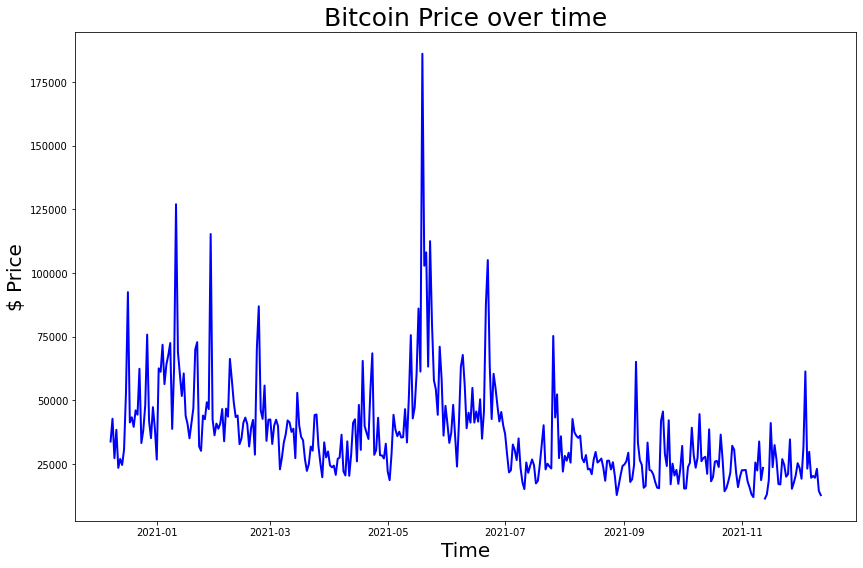

In [21]:
plt.figure(figsize = (14, 9))
plt.plot(df["Date"][-400:-60], df["taker_sell_base_asset_volume"][-400:-60], color='blue', lw=2)
plt.plot(volume_set["Date"], prediction_volume, color='blue', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("volume", size=20)

###predictor using mean

In [77]:
by_mean_colmn = ['low', 'high', 'open', 'close', 'volume','Mean']
output_label_mean = 'close'

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(
df[by_mean_colmn],
df[output_label_mean],
test_size = 0.3
)

In [79]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [80]:
model.score(X_test, Y_test)

1.0

In [81]:
mean_set = df.shift().tail(10)
#mean_set = df.shift(30).tail(30)

In [82]:
prediction_mean = model.predict(mean_set[by_mean_colmn])

Text(0, 0.5, '$ Price')

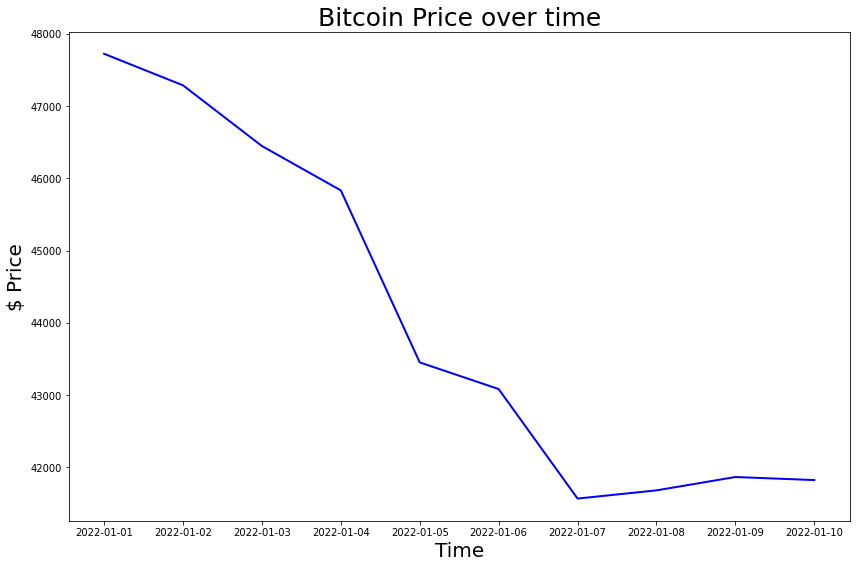

In [83]:
plt.figure(figsize = (14, 9))
#plt.plot(df["Date"], df["Mean"], color='blue', lw=2)
#plt.plot(df["Date"][-400:-60], df["Mean"][-400:-60], color='blue', lw=2)
plt.plot(mean_set["Date"], prediction_mean, color='blue', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)